In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.impute import SimpleImputer
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
import requests
from io import StringIO
import pickle


In [2]:
# Ho importato gli url dei csv attraverso la libreria Request

vino_rosso_url= 'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/wine_quality/winequality-red.csv'
vino_bianco__url = 'https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/wine_quality/winequality-white.csv'

# Ho definito le GET per avere i dati
response_rosso = requests.get(vino_rosso_url)
response_bianco = requests.get(vino_bianco__url)

# Controllo se le GET hanno restituito i dati richiesti
df_vino_rosso = pd.read_csv(StringIO(response_rosso.text), sep=';')
df_vino_bianco = pd.read_csv(StringIO(response_bianco.text), sep=';')

display(df_vino_rosso)
display(df_vino_bianco)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:

# Ho aggiunto una colonna "tow" --> type of wine con valore 0 per il vino rosso
df_vino_rosso['tow'] = 0

# Ho aggiunto una colonna "tow"--> type of wine con valore 1 per il vino bianco
df_vino_bianco['tow'] = 1

# Ho unito i due DataFrame
df_vini = pd.concat([df_vino_rosso, df_vino_bianco], ignore_index=True)


df_vini.columns = ('fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality','tow')

display(df_vini)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,tow
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


   Input variables (based on physicochemical tests):
   
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data):
   12 - quality (score between 0 and 10)

In [4]:
df_vini.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,tow
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [5]:
#cerco per sicurezza se nell dataframe ci sono valori nulli e visto che non ce ne sono non faccio nulla

null_counts = df_vini.isna().sum()
display(null_counts)


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
tow                     0
dtype: int64

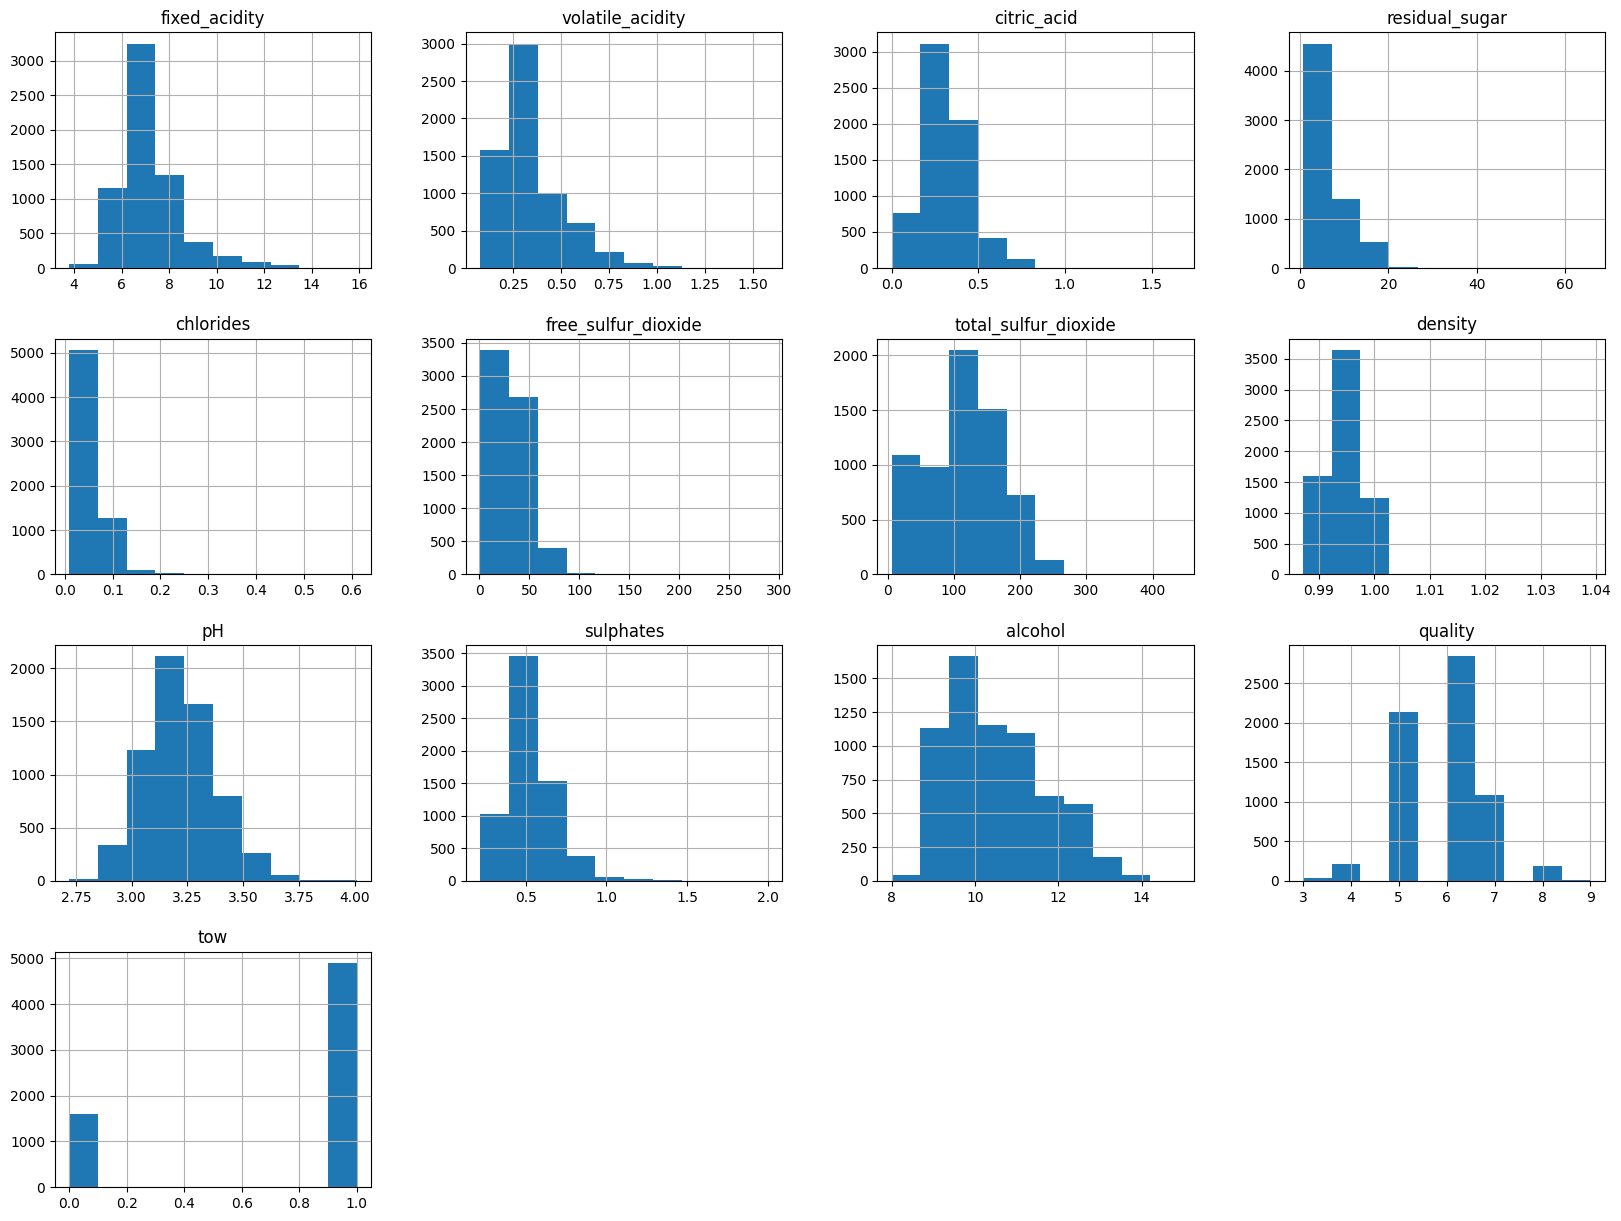

In [6]:
df_vini.hist(figsize=(20,15))
plt.show()

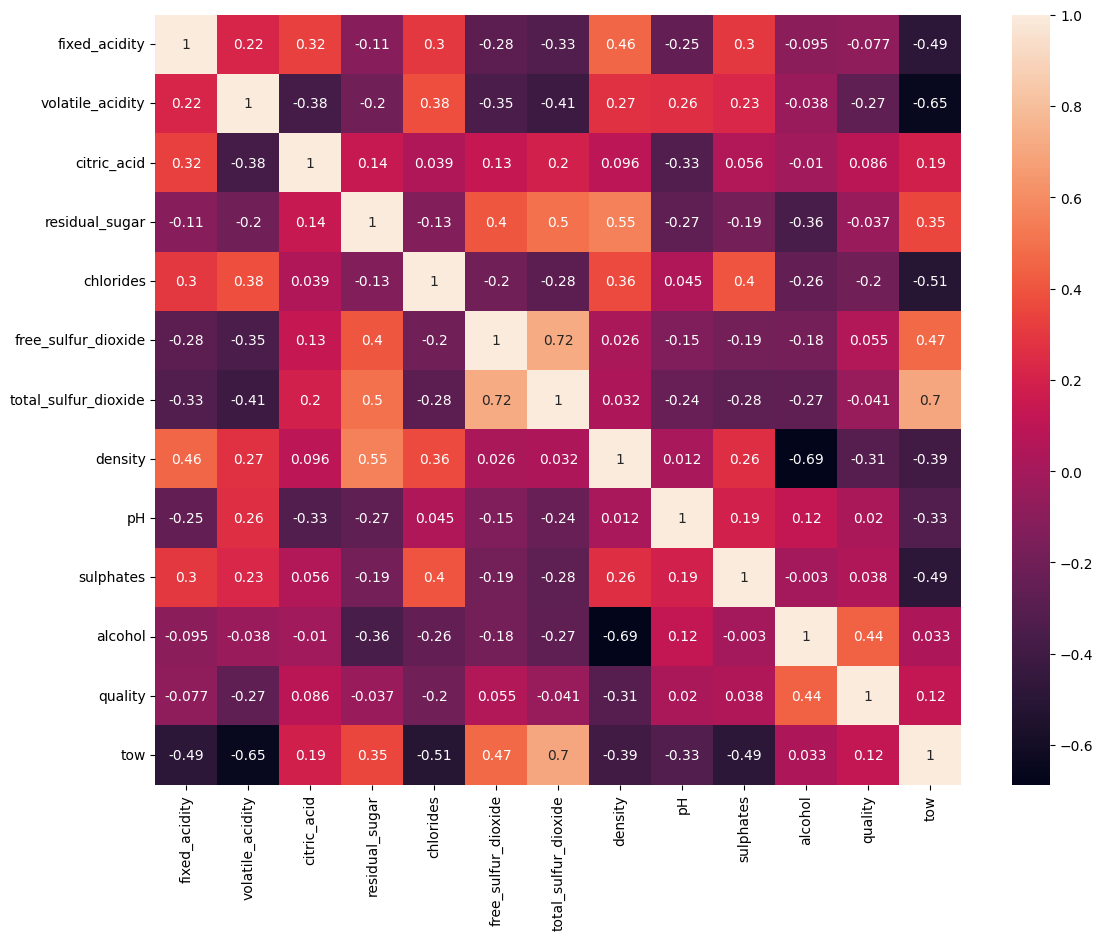

In [7]:
plt.figure(figsize=(13, 10))
corr_matrix = df_vini.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [8]:
#droppiamo la colonna total sulfur dioxide visto che come possiamo vedere nella matrice di correlazione supera il 70
df_vini=df_vini.drop('total_sulfur_dioxide',axis=1)

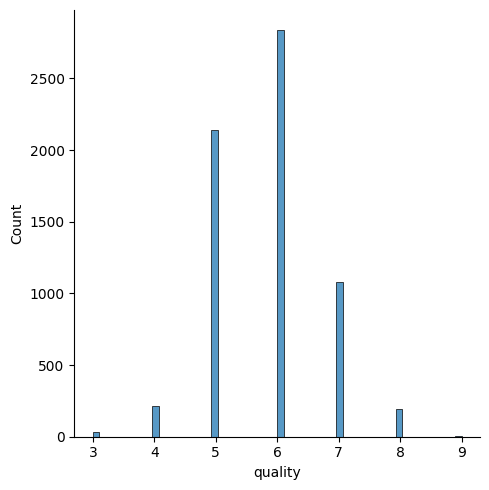

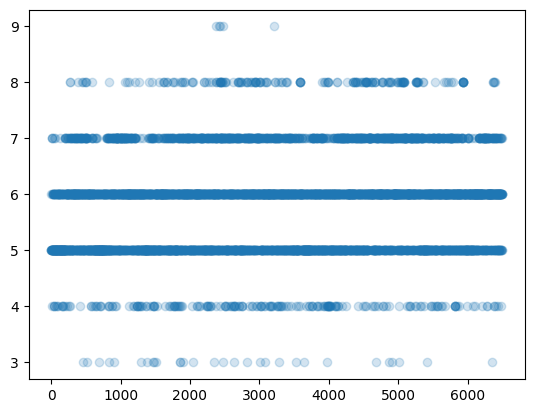

In [9]:
#studio variabile quality

df_temp=df_vini['quality']
sns.displot(df_temp)
plt.show()

temp=df_temp.to_numpy()

plt.scatter(np.arange(temp.size), temp, alpha=0.2)
plt.show()

In [10]:
corr_labels = corr_matrix['quality'].sort_values(ascending=False)
print(corr_labels)

quality                 1.000000
alcohol                 0.444319
tow                     0.119323
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


In [11]:
#Ho creato una nuova colonna top_quality che assegna il valore 1 se la quality del vino è > 5 o il valore 0 se inferiore di 5
df_vini['top_quality'] = [1 if x > 5.8 else 0 for x in df_vini.quality]
display(df_vini)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,tow,top_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,0.99114,3.27,0.50,11.2,6,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,0.99490,3.15,0.46,9.6,5,1,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,0.99254,2.99,0.46,9.4,6,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,0.98869,3.34,0.38,12.8,7,1,1


In [12]:
# Ho salvato il file in questa cartella
df_vini.to_csv("vini.csv")

In [13]:
# Selezione delle features e della colonna target
features = df_vini.drop(['quality', 'top_quality'], axis=1)
target = df_vini['top_quality']

# split di training e testing delle features e del target
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=40)

# shape delle tuple di training e di testing
x_train.shape, x_test.shape


((5197, 11), (1300, 11))

In [14]:
# Normalizzazione dei valori
norm = MinMaxScaler()
xtrain = norm.fit_transform(x_train)
xtest = norm.transform(x_test)
print(xtrain)
print(xtest)

[[0.29166667 0.29333333 0.07831325 ... 0.20786517 0.4057971  0.        ]
 [0.3        0.1        0.29518072 ... 0.04494382 0.44927536 1.        ]
 [0.29166667 0.13333333 0.18072289 ... 0.14606742 0.33333333 1.        ]
 ...
 [0.20833333 0.31333333 0.15662651 ... 0.28651685 0.73913043 1.        ]
 [0.16666667 0.12       0.1746988  ... 0.10674157 0.49275362 1.        ]
 [0.20833333 0.12       0.12650602 ... 0.20224719 0.27536232 1.        ]]
[[0.45833333 0.12666667 0.31927711 ... 0.51123596 0.57971014 0.        ]
 [0.24166667 0.14       0.13253012 ... 0.14044944 0.62318841 1.        ]
 [0.31666667 0.27333333 0.60240964 ... 0.1011236  0.57971014 1.        ]
 ...
 [0.23333333 0.15333333 0.10843373 ... 0.12359551 0.20289855 1.        ]
 [0.24166667 0.02       0.1626506  ... 0.08426966 0.27536232 1.        ]
 [0.40833333 0.35333333 0.11445783 ... 0.15730337 0.28985507 0.        ]]


In [15]:

# Inizializzazione del modello di regressione logistica
logistic_model = LogisticRegression()

# Training del modello
logistic_model.fit(xtrain, y_train)

# PrevisionI sui test
y_pred_logistic = logistic_model.predict(xtest)

# Definizione della precisione del modello
accuracy = accuracy_score(y_test, y_pred_logistic)
print('Precisione del modello:', accuracy)


# Inizializzazione della matrice di confusione
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Definizione dell'errore quadrato medio
mse = mean_squared_error(y_test, y_pred_logistic)
print('MSE:', mse)

# Definizione di r2
r2 = r2_score(y_test, y_pred_logistic)
print('R2:', r2)


Precisione del modello: 0.74
MSE: 0.26
R2: -0.1573787504839972


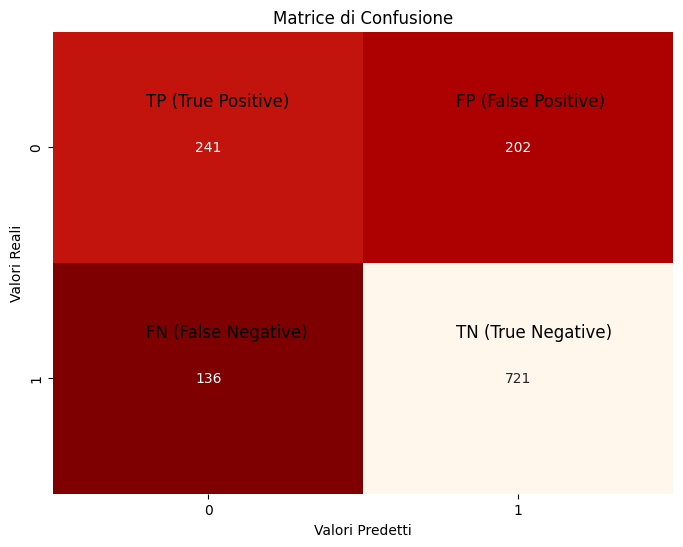

In [16]:
# matrice di confusione

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="OrRd_r", cbar=False)

# label della matrice di confusione
plt.text(0.3, 0.3, 'TP (True Positive)', fontsize=12, color='black', verticalalignment='center')
plt.text(1.3, 0.3, 'FP (False Positive)', fontsize=12, color='black', verticalalignment='center')
plt.text(0.3, 1.3, 'FN (False Negative)', fontsize=12, color='black', verticalalignment='center')
plt.text(1.3, 1.3, 'TN (True Negative)', fontsize=12, color='black', verticalalignment='center')

plt.xlabel('Valori Predetti')
plt.ylabel('Valori Reali')
plt.title('Matrice di Confusione')
plt.show()

In [17]:
#Ho salvato il modello in questa cartella grazie alla libreria pickle

pickle.dump(logistic_model,open("modello.pkl","wb"))
model = pickle.load(open("modello.pkl", "rb"))